<font size=7> Latencies Analysis

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, latencies
from human_hip.animate import animate_latencies
import human_hip.spike_data as spike_data

In [2]:
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle
from ipywidgets import interact_manual, interact

In [3]:
#sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/derived/kilosort2/Hc120523_aav9hckcr1_chip21769_121123_2_acqm.zip" )
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")


In [6]:
sttc_delta=20
sttc_cutoff = 0.04

print(sd.N**2 , "Starting Pairs")
sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])
print( len(pairs), "pairs above sttc cutoff")

all_pair_latencies = []
#pairs_late = [] #lags_late = []
count = 0
for pair in pairs:
    count += 1
    if count % 1000 == 0:
        print(count)
    pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=150)  #latency= np.median(pair_latencies)
    #if abs(np.median(pair_latencies))> latency_cutoff:
    #    pairs_late.append( pair )  #lags_late.append( latency )
    all_pair_latencies.append( pair_latencies )

32400 Starting Pairs


12828 pairs above sttc cutoff
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [9]:
with open( 'all_pair_latencies_150ms.pkl' , 'wb') as my_file:
   pickle.dump( all_pair_latencies , my_file )

In [10]:
print(len(pairs))
print(len(all_pair_latencies))

12828
12828


In [12]:
#curated_latencies = []
curated_pairs = []
len_all_pair_latencies = []
for i in range(len(all_pair_latencies)):
    len_all_pair_latencies.append(len(all_pair_latencies[i]))
#curated_pairs.append( pairs[i] )

(array([717., 595., 860., 868., 839., 827., 668., 587., 552., 662., 719.,
        840., 868., 537., 258., 286., 321., 367., 205., 150.,  95.,  94.,
         87., 101.,  62.,  54.,  48., 106.,  42.,  29.,  31.,  18.,  27.,
         24.,  14.,  15.,  17.,  26.,  17.,  13.,   8.,   7.,   8.,  11.,
          8.,  13.,   8.,  12.,   4.,   3.,   7.,   4.,   4.,  10.,   8.,
          5.,   7.,   1.,   2.,   5.,   3.,   1.,   1.,   0.,   1.,   2.,
          3.,   2.,   2.,   1.,   1.,   1.,   1.,   0.,   1.,   1.,   1.,
          2.,   1.,   1.,   1.,   1.,   2.,   2.,   3.,   0.,   1.,   1.,
          1.,   1.,   1.,   3.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          2.]),
 array([3.00000e+00, 6.88800e+01, 1.34760e+02, 2.00640e+02, 2.66520e+02,
        3.32400e+02, 3.98280e+02, 4.64160e+02, 5.30040e+02, 5.95920e+02,
        6.61800e+02, 7.27680e+02, 7.93560e+02, 8.59440e+02, 9.25320e+02,
        9.91200e+02, 1.05708e+03, 1.12296e+03, 1.18884e+03, 1.25472e+03,
        1.32060e+03, 1.386

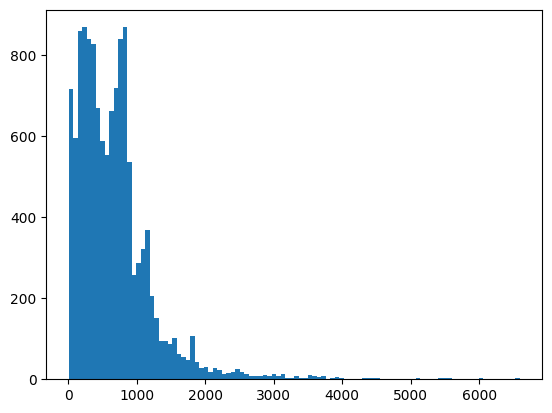

In [13]:
plt.hist(len_all_pair_latencies, bins=100)

In [14]:
curated_latencies = []
curated_pairs = []
for i in range(len(all_pair_latencies)):
    pair_latencies = all_pair_latencies[i]
    if abs(np.mean(pair_latencies))> 20 and len(pair_latencies)>200: #abs(np.median(pair_latencies))> 1.5 and 
        if np.mean(pair_latencies) < 0:
            curated_pairs.append( pairs[i] )  #lags_late.append( latency )
            curated_latencies.append( pair_latencies )
        else:
            curated_pairs.append( [ pairs[i][1], pairs[i][0] ] ) 
            curated_latencies.append( pair_latencies )
#curated_pairs.append( pairs[i] )

In [15]:
len( curated_pairs)

434

In [16]:
curated_pairs 

[[0, 34],
 [0, 114],
 [134, 0],
 [4, 1],
 [19, 1],
 [1, 34],
 [56, 1],
 [1, 66],
 [89, 1],
 [1, 114],
 [134, 1],
 [157, 1],
 [164, 1],
 [173, 1],
 [4, 2],
 [15, 2],
 [19, 2],
 [23, 2],
 [2, 34],
 [56, 2],
 [2, 66],
 [89, 2],
 [134, 2],
 [157, 2],
 [161, 2],
 [164, 2],
 [170, 2],
 [172, 2],
 [173, 2],
 [4, 3],
 [15, 3],
 [23, 3],
 [45, 3],
 [56, 3],
 [3, 66],
 [164, 3],
 [173, 3],
 [5, 34],
 [134, 5],
 [7, 34],
 [7, 112],
 [7, 114],
 [19, 8],
 [23, 8],
 [8, 34],
 [56, 8],
 [8, 66],
 [89, 8],
 [109, 8],
 [8, 114],
 [120, 8],
 [134, 8],
 [157, 8],
 [164, 8],
 [169, 8],
 [173, 8],
 [10, 72],
 [10, 166],
 [12, 34],
 [134, 12],
 [13, 114],
 [134, 13],
 [164, 13],
 [14, 34],
 [14, 114],
 [16, 34],
 [16, 114],
 [134, 16],
 [19, 17],
 [23, 17],
 [17, 34],
 [45, 17],
 [56, 17],
 [17, 66],
 [89, 17],
 [17, 114],
 [120, 17],
 [134, 17],
 [137, 17],
 [157, 17],
 [163, 17],
 [164, 17],
 [169, 17],
 [170, 17],
 [172, 17],
 [173, 17],
 [19, 151],
 [20, 34],
 [56, 20],
 [20, 66],
 [89, 20],
 [20, 114],

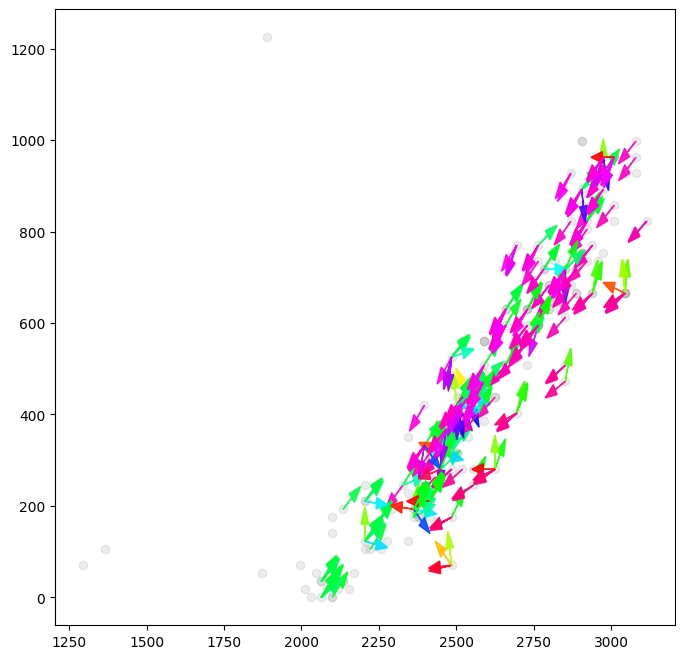

In [17]:
plot_vector_layout( sd, np.array(curated_pairs)  )

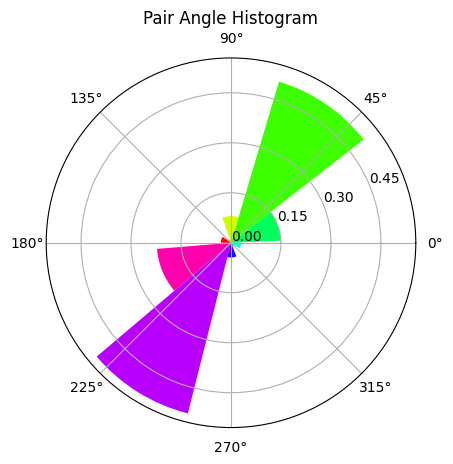

In [18]:
plot_latency_angle_hist( sd, np.array(curated_pairs), by_firing_rate=True)

In [19]:
curated_pairs = np.array(curated_pairs)

In [20]:
def pairs_hisogram(pairs, sd, ms_cutoff_high=15):
    @interact
    def plot_pair(pair = (0, len(pairs)-1) ):
        latencies_pair = latencies( pairs[pair,0], pairs[pair,1], sd, ms_cutoff_high=150  )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)

In [21]:
pairs_hisogram( curated_pairs, sd, ms_cutoff_high=150)

interactive(children=(IntSlider(value=216, description='pair', max=433), Output()), _dom_classes=('widget-inte…

In [26]:
@interact_manual(num=(0,len(curated_pairs)-1))
def analyzePair(num):
    plot_pair_analysis( curated_pairs[num][0], curated_pairs[num][1], sd)

interactive(children=(IntSlider(value=41, description='num', max=83), Button(description='Run Interact', style…

In [32]:
plt.hist(curated_latencies[0])

IndexError: list index out of range

In [33]:
pair_latencies

array([  14.8 ,  -25.05,   -1.5 , -125.7 ,   76.7 ,  111.7 ,   43.8 ,
         27.4 ,  -55.85,   61.4 ,   21.25, -120.9 ,  -61.35,   -9.15,
        -93.15,   42.5 ,    8.4 , -131.35,    0.45,  -86.1 ,  100.9 ,
        -74.2 ,  -91.7 , -125.3 ,  -36.3 ,   81.85,  -83.9 ,  -16.05,
        138.95,   88.15,  -39.15,   77.15,    2.35,  -23.4 ,  -92.9 ,
         34.1 ,  -62.85,   19.55,  -87.4 ,  126.3 ,   22.1 ,  -30.75,
        -37.65,  -66.75,   44.4 ,  -54.5 ,   32.9 ,   -2.65,  -31.5 ,
       -125.05,  137.2 ,  115.4 ,  -36.35,   31.05,  -25.45, -121.3 ,
       -123.9 ,  107.25,   97.5 ,   -2.85,   97.95,  -86.7 ,   61.1 ,
        -19.55,  -19.5 , -122.8 ,   58.  ,  -67.2 ,   91.3 ,  -28.8 ,
         48.  , -123.55,  -14.15,  105.95,  -39.55,  112.05,  -14.5 ,
         41.35,  -21.2 ,  -22.95, -144.95,  -49.8 ,   -1.15,   79.6 ,
       -107.75,  128.4 ,  -96.1 ,  -19.5 ,   90.6 ,   54.3 ,   77.25,
        -60.5 ,   14.55,   -8.8 ,   19.05,   79.7 ,  -68.95,    5.35,
       -128.4 ,  124

In [34]:
pair_latencies * -1

array([ -14.8 ,   25.05,    1.5 ,  125.7 ,  -76.7 , -111.7 ,  -43.8 ,
        -27.4 ,   55.85,  -61.4 ,  -21.25,  120.9 ,   61.35,    9.15,
         93.15,  -42.5 ,   -8.4 ,  131.35,   -0.45,   86.1 , -100.9 ,
         74.2 ,   91.7 ,  125.3 ,   36.3 ,  -81.85,   83.9 ,   16.05,
       -138.95,  -88.15,   39.15,  -77.15,   -2.35,   23.4 ,   92.9 ,
        -34.1 ,   62.85,  -19.55,   87.4 , -126.3 ,  -22.1 ,   30.75,
         37.65,   66.75,  -44.4 ,   54.5 ,  -32.9 ,    2.65,   31.5 ,
        125.05, -137.2 , -115.4 ,   36.35,  -31.05,   25.45,  121.3 ,
        123.9 , -107.25,  -97.5 ,    2.85,  -97.95,   86.7 ,  -61.1 ,
         19.55,   19.5 ,  122.8 ,  -58.  ,   67.2 ,  -91.3 ,   28.8 ,
        -48.  ,  123.55,   14.15, -105.95,   39.55, -112.05,   14.5 ,
        -41.35,   21.2 ,   22.95,  144.95,   49.8 ,    1.15,  -79.6 ,
        107.75, -128.4 ,   96.1 ,   19.5 ,  -90.6 ,  -54.3 ,  -77.25,
         60.5 ,  -14.55,    8.8 ,  -19.05,  -79.7 ,   68.95,   -5.35,
        128.4 , -124

In [ ]:
cross_sttc_min_cutoff=2, cross_sttc_max_cutoff=15, sttc_cutoff = 0.04, latency_cutoff=1, sttc_delta=20

    # Get all latencies whose STTC is above some minimum STTC cuttoff
    print(sd.N**2 , "Starting Pairs")
    sttc_neo = sd.spike_time_tilings( sttc_delta )    # sttc matrix   
    pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
    for i in range(sd.N):
        for j in range(i+1,sd.N):
            if sttc_neo[i,j] > sttc_cutoff:
                pairs.append([i,j])
    print( len(pairs), "pairs above sttc cutoff")

    # Get all latencies whose median latency is above some minimum Latency Cuttoff
    pairs_late = [] #lags_late = []
    for pair in pairs:
        pair_latencies = latencies( pair[0], pair[1], sd, ms_cutoff_high=20)  #latency= np.median(pair_latencies)
        if abs(np.median(pair_latencies))> latency_cutoff:
            pairs_late.append( pair )  #lags_late.append( latency )
    pairs= pairs_late
    print( len(pairs_late), "pairs above latencency cutoff")

    # Do cross sttc for all pairs
    print("Starting cross_sttc calculation... might take a minute")
    cross_lag  = [] 
    for pair in pairs: 
        sttcs = cross_sttc( pair[0], pair[1], sd, delt=sttc_delta ) 
        max_args = np.argwhere(sttcs == np.amax(sttcs)) - 1000 
        cross_lag.append( max_args[np.argmin(np.abs(max_args))][0] )   # if multiple maxima, take the one closest to zero
    cross_lag = np.array(cross_lag)
    to_keep = np.where((np.abs(cross_lag)< cross_sttc_max_cutoff) & (np.abs(cross_lag)> cross_sttc_min_cutoff) & (cross_lag!=0) )[0]
    print( len(to_keep), "pairs between cross_sttc cutoffs")
    return np.array(pairs)[ to_keep ] 





In [ ]:
good_pairs = curate_latencies(sd)
good_pairs = curate_latencies(sd)
with open( 'curate_latencies_good_pairs.pkl' , 'wb') as my_file:
   pickle.dump(good_pairs, my_file)

In [4]:
#good_pairs = curate_latencies(sd)
# good_pairs = curate_latencies(sd)
# with open( 'curate_latencies_good_pairs.pkl' , 'wb') as my_file:
#    pickle.dump(good_pairs, my_file)
#load pickled data
with open( 'curate_latencies_good_pairs.pkl' , 'rb') as my_file:
    good_pairs = pickle.load(my_file)
print(len(good_pairs))

466


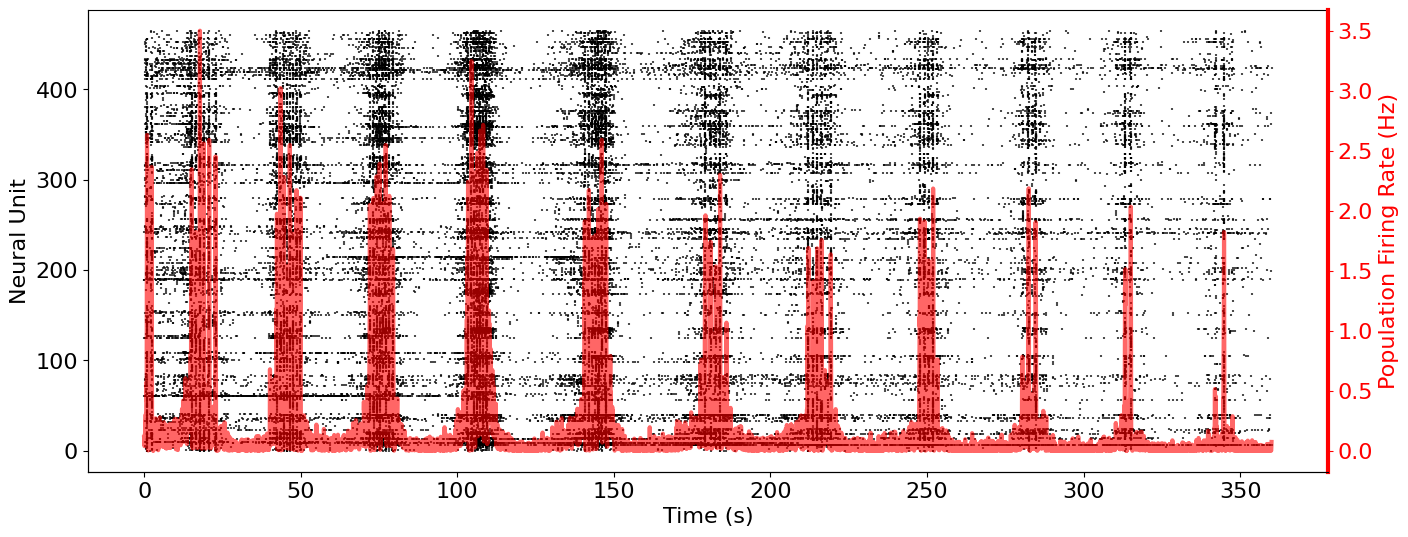

In [5]:
plot_raster_latency_pairs( sd, good_pairs )

In [6]:
plot_raster_latency_pairs

<function human_hip.spike_data.plot_latencies.plot_raster_latency_pairs(sd, pairs, xlim=None, size=(16, 6))>

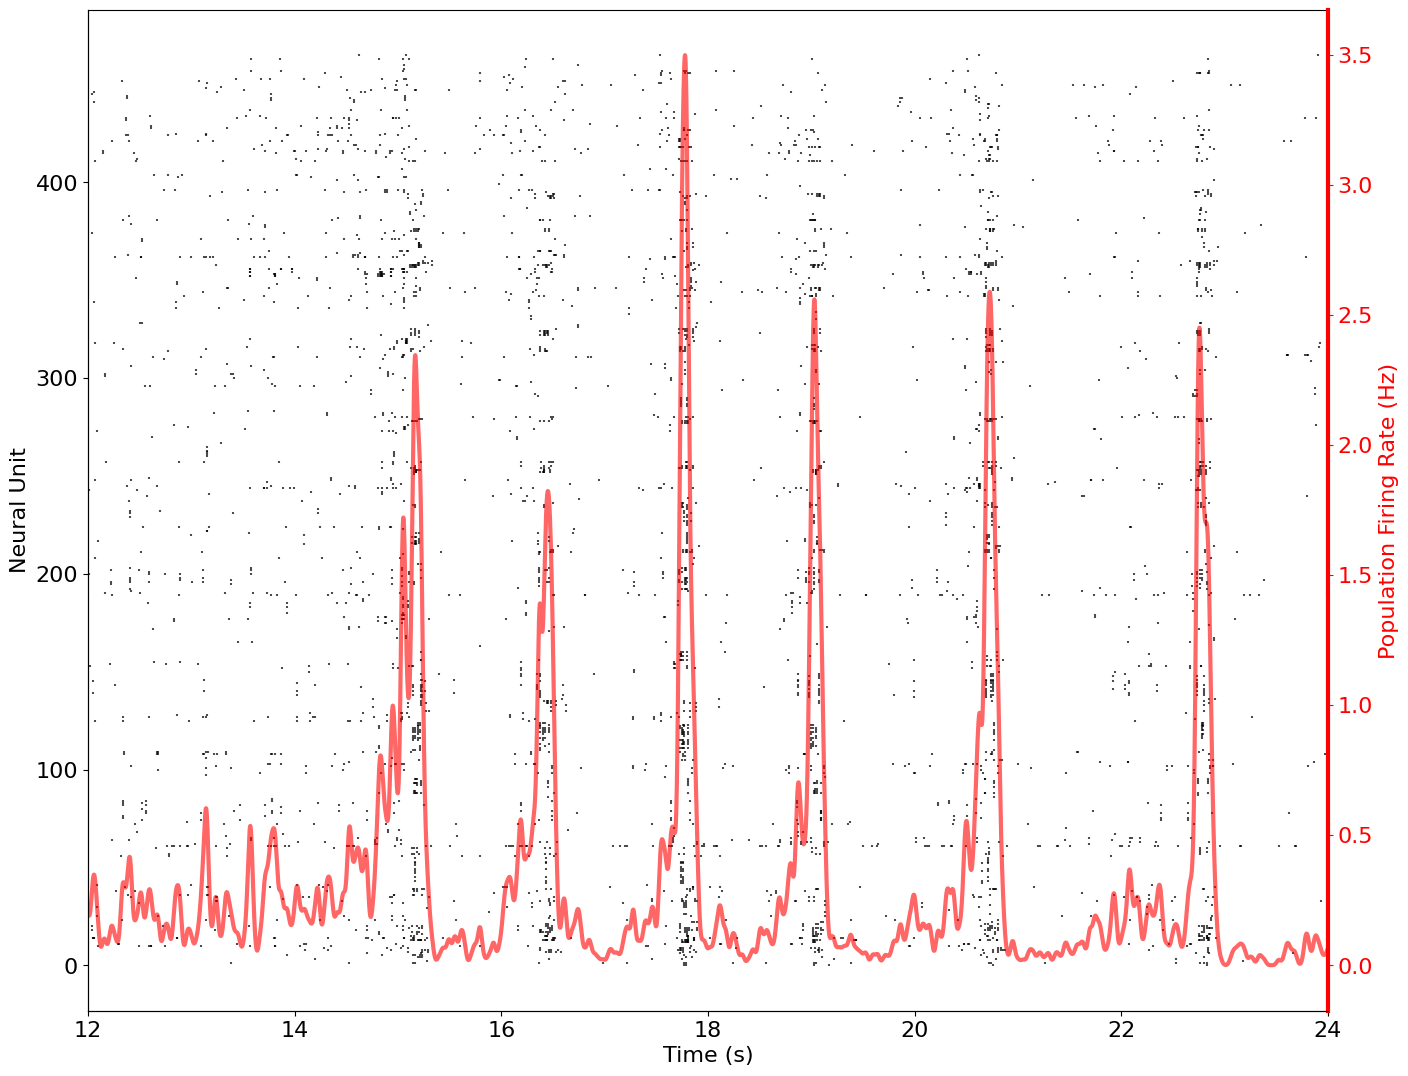

In [7]:
plot_raster_latency_pairs( sd, good_pairs, xlim=(12,24), size=(16,13) )

540 um -- average pair distance
549 um -- average latency distance


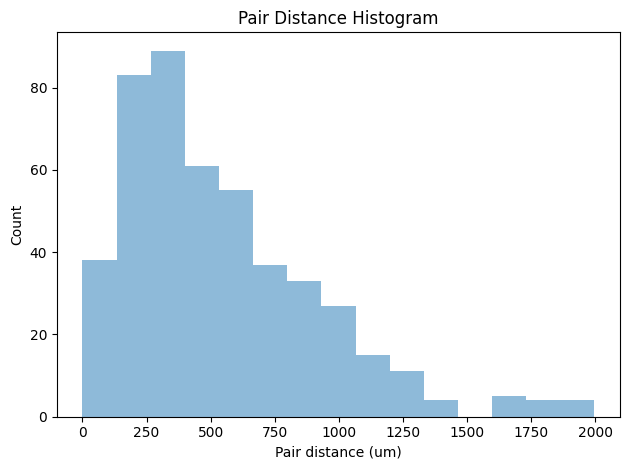

In [8]:
plot_latency_dist_hist(sd, good_pairs)

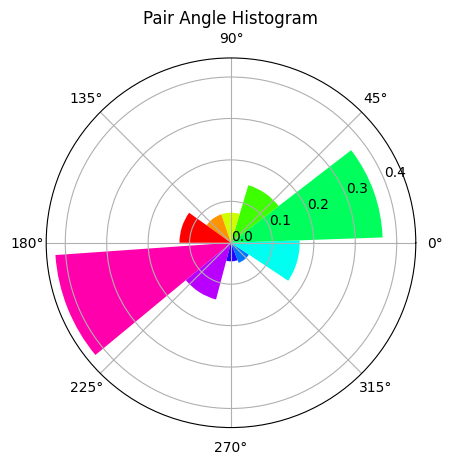

In [9]:
plot_latency_angle_hist( sd, good_pairs)

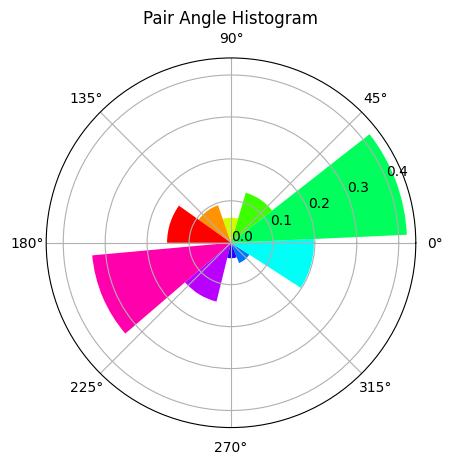

In [10]:
plot_latency_angle_hist( sd, good_pairs, by_firing_rate=True)

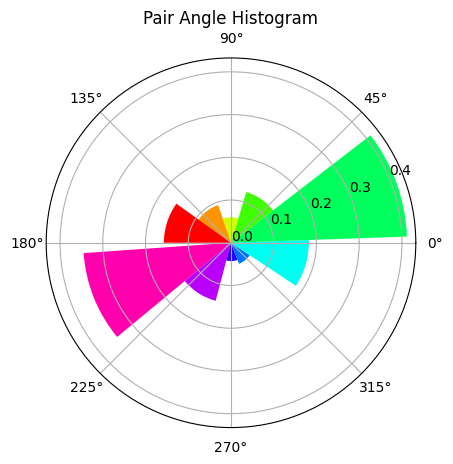

In [5]:
plot_latency_angle_hist( sd, good_pairs, by_firing_rate=True)

# Vector Plots

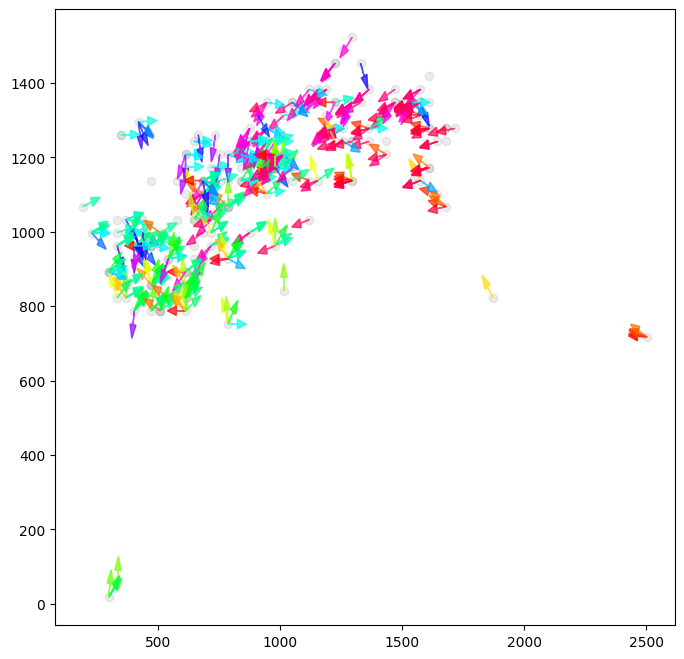

In [5]:
plot_vector_layout( sd, good_pairs)

In [8]:
@interact_manual(num=(0,len(good_pairs)-1))
def analyzePair(num):
    plot_pair_analysis( good_pairs[num][0], good_pairs[num][1], sd)

interactive(children=(IntSlider(value=232, description='num', max=465), Button(description='Run Interact', sty…

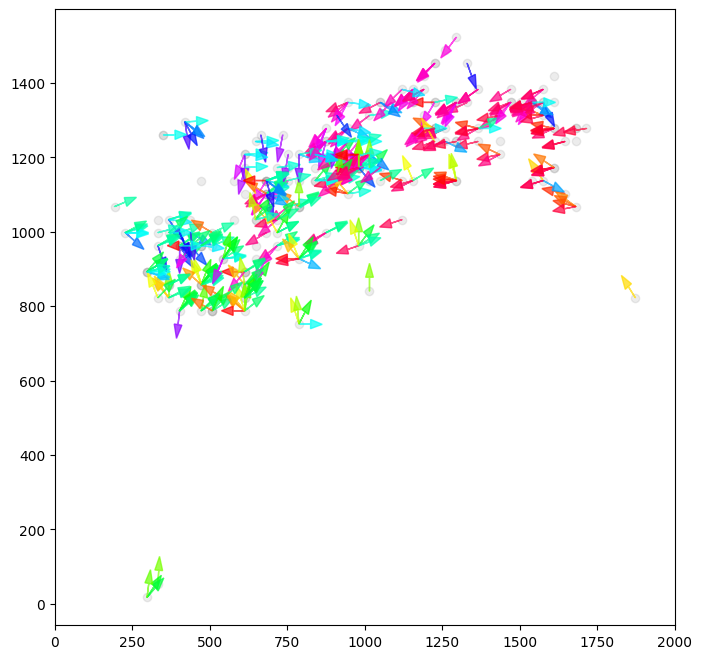

In [7]:
plot_vector_layout( sd, good_pairs,  xlim=(0,2000) )

/tmp/ipykernel_1464/3989538213.py:14: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_1464/3989538213.py:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


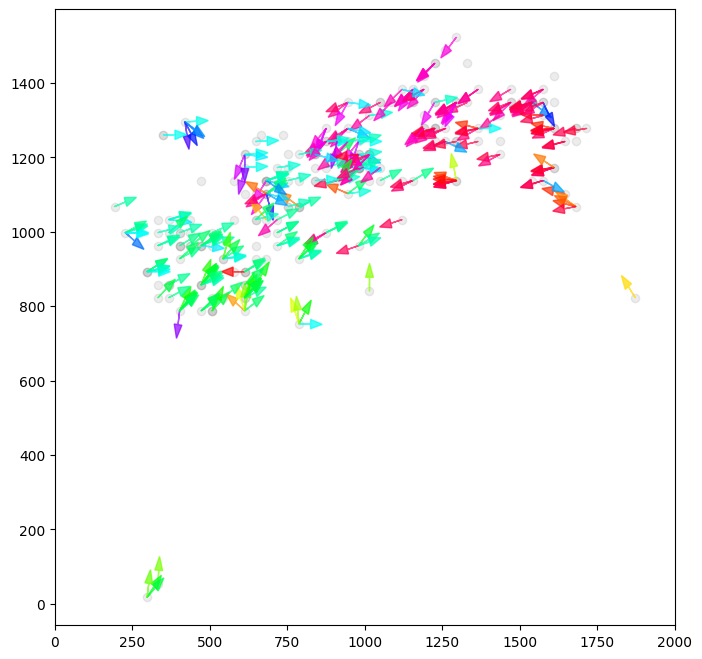

In [11]:
plot_vector_layout( sd, good_pairs, min_dist=300, xlim=(0,2000) )

/tmp/ipykernel_24052/2995960396.py:28: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_24052/2995960396.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('hsv')


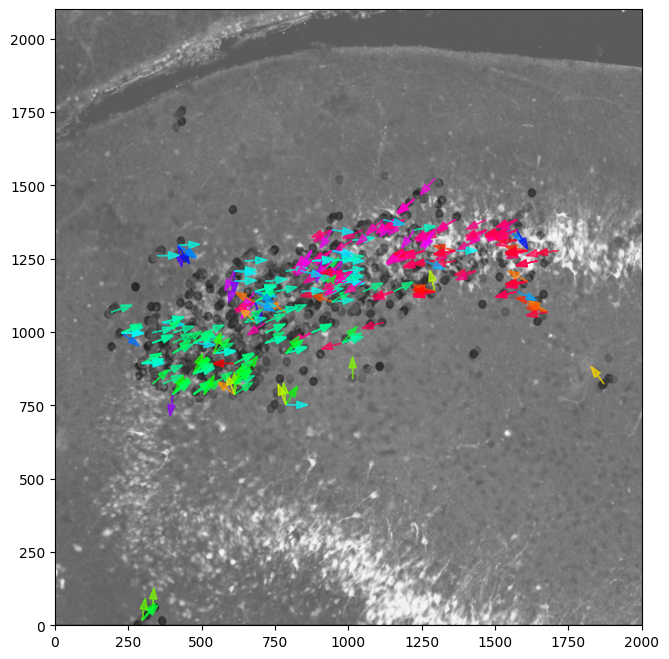

In [16]:
plot_vector_layout( sd, good_pairs, min_dist=300, xlim=(0,2000), image_path="/workspaces/human_hippocampus/data/histology/hc112823_bw.jpeg" )

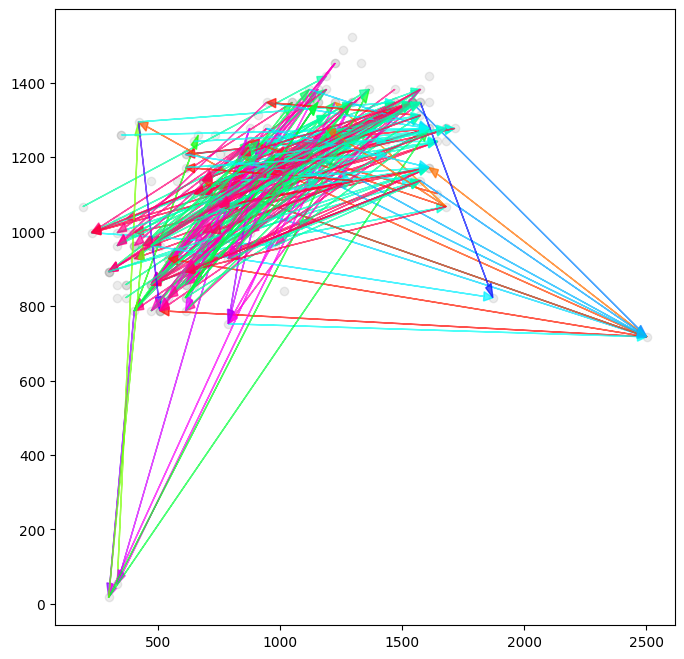

In [13]:
plot_vector_layout( sd, good_pairs, min_dist=500, normalize=False )

# Make Animations

In [15]:
animate_latencies(plot_vector=True, ms_range=range(0,1000) )

<function human_hip.animate.animate_latency_pairs.animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, directed_backwards=False, filename='latencies.mp4', latency_ms_cutoff_low=1, latency_ms_cutoff_high=15, plot_vector=False, min_dist=0)>

25781 latency events occured in total spikedata
Making animation of 3.008 minutes
Saved animation to media/latencies.mp4


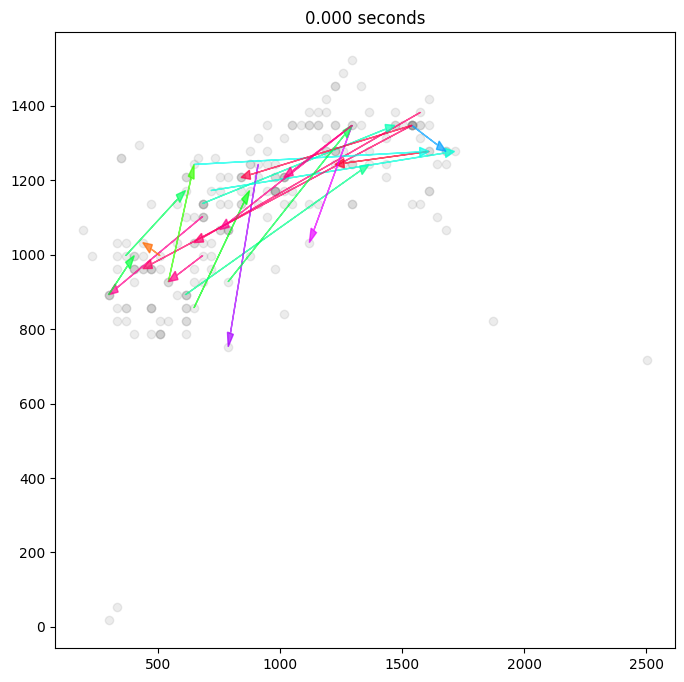

In [14]:
animate_latencies(sd, good_pairs, filename="media/latencies.mp4" )

1860 latency events occured in total spikedata
668 latency events occured above 500 um distance
Making animation of 2.283 minutes
Saved animation to media/latencies_mindist500.mp4


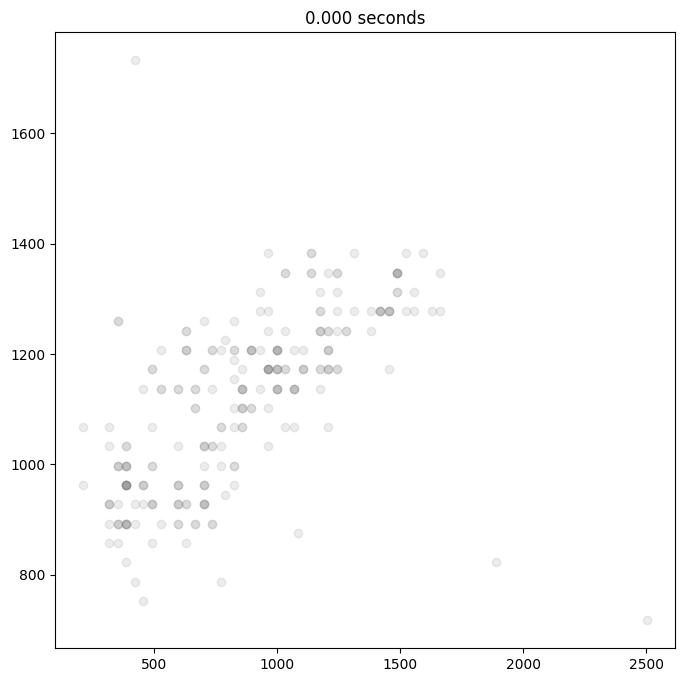

In [13]:
animate_latencies(sd, good_pairs,  filename='media/latencies_mindist500.mp4', min_dist=500 )

In [ ]:
# animate_latencies(sd, pairs, movie_range_ms=None, frame_interval_ms=500, directed=True, filename="latencies.mp4",
#                       latency_ms_cutoff_low=0, latency_ms_cutoff_high=15 ):